<a href="https://colab.research.google.com/github/pascal-p/AML_BM_ML/blob/master/gp_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First things first
Click **File -> Save a copy in Drive** and click **Open in new tab** in the pop-up window to save your progress in Google Drive.

# Gaussian processes and Bayesian optimization

In this assignment you will learn how to use <a href="http://sheffieldml.github.io/GPy/">GPy</a> and <a href="http://sheffieldml.github.io/GPyOpt/">GPyOpt</a> libraries to deal with gaussian processes. These libraries provide quite simple and inuitive interfaces for training and inference, and we will try to get familiar with them in a few tasks.

### Setup
Load auxiliary files and then install and import the necessary libraries.

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Downloading Colab files")
    ! shred -u setup_google_colab.py
    ! wget https://raw.githubusercontent.com/hse-aml/bayesian-methods-for-ml/master/setup_google_colab.py -O setup_google_colab.py
    import setup_google_colab
    setup_google_colab.load_data_week6()

--2019-03-29 09:48:56--  https://raw.githubusercontent.com/hse-aml/bayesian-methods-for-ml/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1308 (1.3K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.28K  --.-KB/s    in 0s      

2019-03-29 09:48:56 (257 MB/s) - ‘setup_google_colab.py’ saved [1308/1308]



In [2]:
! pip install GPy gpyopt xgboost

In [0]:
import numpy as np
import GPy
import GPyOpt
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import time
from w6_grader import GPGrader
%matplotlib inline

### Grading
We will create a grader instance below and use it to collect your answers. Note that these outputs will be stored locally inside grader and will be uploaded to platform only after running submiting function in the last part of this assignment. If you want to make partial submission, you can run that cell any time you want.

In [0]:
grader = GPGrader()

## Gaussian processes: GPy (<a href="http://pythonhosted.org/GPy/">documentation [?]</a> or <a href="https://pypi.org/project/GPy/">documentation </a>)

We will start with a simple regression problem, for which we will try to fit a Gaussian Process with RBF kernel.

In [0]:
def generate_points(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3., 3., (n, 1))
    y = np.sin(X) + np.random.randn(n, 1) * noise_variance**0.5
    return X, y
    
def generate_noise(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3., 3., (n, 1))
    y = np.random.randn(n, 1) * noise_variance**0.5
    return X, y

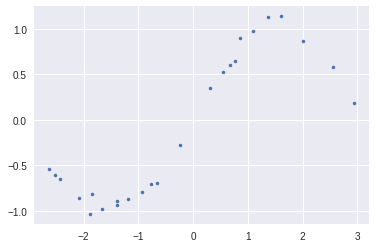

In [28]:
# Create data points
X, y = generate_points()
plt.plot(X, y, '.')
plt.show()

To fit a Gaussian Process, you will need to define a kernel. For Gaussian (GBF) kernel you can use `GPy.kern.RBF` function.

<b> Task 1.1: </b> Create RBF kernel with variance 1.5 and length-scale parameter 2 for 1D samples and compute value of the kernel between points `X[5]` and `X[9]`. Submit a single number. 
<br><b>Hint:</b> use `.K` property of kernel object.

In [29]:
inp_dim = 1   # input dimension
var = 1.5     # variance 
len_scale = 2 # length scale

kernel = GPy.kern.RBF(inp_dim, variance=var, lengthscale=len_scale)  ### YOUR CODE HERE
kernel_59 = kernel.K(X, X)[5, 9] ### YOUR CODE HERE
grader.submit_GPy_1(kernel_59)

Current answer for task 1.1 is: 1.0461813545396959


<b> Task 1.2: </b> Fit GP into generated data. Use kernel from previous task. Submit predicted mean and variance at position $x=1$.
<br><b>Hint:</b> use `GPy.models.GPRegression` class.

In [30]:
### YOUR CODE HERE
# x1 = np.array([X[1]])
print("X: " + str(X))

model = GPy.models.GPRegression(X, y, kernel=kernel)
mean, variance = model.predict(np.array([[1]]))

mean = mean[0][0]
variance = variance[0][0]
print(" mean: " + str(mean) + " / variance: " + str(variance))

grader.submit_GPy_2(mean, variance)

X: [[-2.08401759]
 [-1.18586034]
 [-2.62778151]
 [-0.24083795]
 [ 2.01152031]
 [ 2.56198229]
 [ 1.36193391]
 [ 1.61097733]
 [-1.3847696 ]
 [ 0.86417575]
 [-2.43976046]
 [-2.52188469]
 [ 0.53768252]
 [-0.93995677]
 [ 2.93325689]
 [ 0.75883924]
 [ 1.09067568]
 [ 0.31354088]
 [-1.38683965]
 [-0.76044368]
 [-1.66243141]
 [-1.8813444 ]
 [-0.65611144]
 [-1.84102557]
 [ 0.66546559]]
 mean: 0.6646774926102937 / variance: 1.1001478223790582
Current answer for task 1.2 (mean) is: 0.6646774926102937
Current answer for task 1.2 (variance) is: 1.1001478223790582


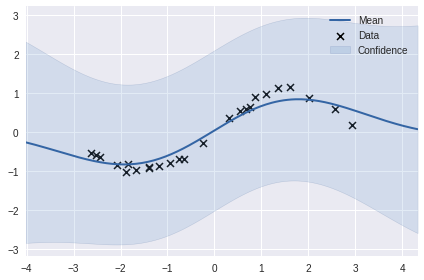

In [13]:
model.plot()
plt.show()

We see that the model didn't fit the data quite well. Let's try to fit kernel and noise parameters automatically as discussed in the lecture! You can see the current parameters below:

In [14]:
# print(" model.Gaussian_noise.variance: " + str(model.Gaussian_noise.variance))
model


GP_regression.,value,constraints,priors
rbf.variance,1.5,+ve,
rbf.lengthscale,2.0,+ve,
Gaussian_noise.variance,1.0,+ve,


<b> Task 1.3: </b> Optimize length-scale, variance and noise component of the model and submit optimal length-scale value of the kernel. 
<br><b>Hint:</b> Use `.optimize()` function of the model and `.lengthscale` property of the kernel.

In [15]:
### YOUR CODE HERE
model.optimize()

lengthscale = kernel.lengthscale
grader.submit_GPy_3(lengthscale)

Current answer for task 1.3 is: 1.6252681650349912


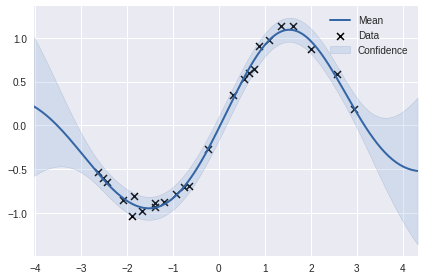

In [16]:
model.plot()
plt.show()

As you see, the process generates outputs just right. Let's see if GP can figure out itself when we try to fit it into noise or signal.

<b> Task 1.4: </b> Generate two datasets: 
 
*   sinusoid without noise and 
*   samples from gaussian noise.


Optimize kernel parameters and submit optimal values of noise component.
<br><b>Note:</b> generate data only using ```generate_points(n, noise_variance)``` and ```generate_noise(n, noise_variance)``` function!

In [0]:
X, y = generate_noise(noise_variance=10)

### YOUR CODE HERE
model = GPy.models.GPRegression(X, y, kernel=kernel)
model.optimize()

noise = model.Gaussian_noise.variance

In [0]:
X, y = generate_points(noise_variance=0)
### YOUR CODE HERE

X, y = generate_points(noise_variance=0.)
model = GPy.models.GPRegression(X, y, kernel=kernel)
model.optimize()

just_signal = model.Gaussian_noise.variance

In [19]:
# just_signal == variance of model w/o noise aka Gaussian_noise.variance
grader.submit_GPy_4(noise, just_signal)

Current answer for task 1.4 (noise) is: 10.143329676224383
Current answer for task 1.4 (just signal) is: 1.4982810919653512e-14


## Sparse GP
Now let's consider the speed of GP. We will generate a dataset of 3000 points and measure the time that is consumed for prediction of mean and variance for each point. We will then try to use inducing inputs and find the optimal number of points according to quality-time tradeoff.

For the sparse model with inducing points, you should use ```GPy.models.SparseGPRegression``` class. You can set the number of inducing inputs with parameter ```num_inducing``` and optimize their positions and values with ```.optimize()``` call.

<b>Task 1.5</b>: Create a dataset of 1000 points and fit GPRegression. Measure time for predicting mean and variance at position $x=1$. Then fit `SparseGPRegression` with 10 inducing inputs and repeat the experiment. Report speedup as a ratio between consumed time without and with inducing inputs.

In [0]:
X, y = generate_points(1000)

In [0]:
start = time.time()

### YOUR CODE HERE
model = GPy.models.GPRegression(X, y, kernel=kernel)
x1 = np.array([X[1]])
mean, variance = model.predict(x1)

time_gp = time.time() - start

In [0]:
start = time.time()

### YOUR CODE HERE
model = GPy.models.SparseGPRegression(X, y, num_inducing=10, kernel=kernel)
x1 = np.array([X[1]])
mean, variance = model.predict(x1)

time_sgp = time.time() - start

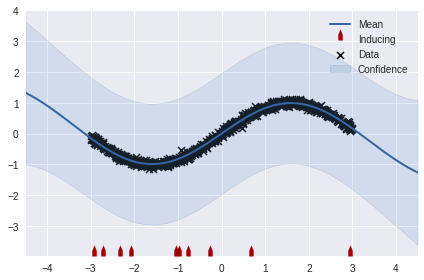

In [23]:
model.plot()
plt.show()

In [24]:
grader.submit_GPy_5(time_gp / time_sgp)

Current answer for task 1.5 is: 4.204566911334504


## Bayesian optimization: GPyOpt (<a href="http://pythonhosted.org/GPyOpt/">documentation</a>, <a href="http://nbviewer.jupyter.org/github/SheffieldML/GPyOpt/blob/master/manual/index.ipynb">tutorials</a>)

In this part of the assignment, we will try to find optimal hyperparameters to XGBoost model! We will use data from a small competition to speed things up, but keep in mind that the approach works even for large datasets.

We will use diabetes dataset provided in sklearn package.

In [0]:
dataset = sklearn.datasets.load_diabetes()
X = dataset['data']
y = dataset['target']

We will use cross-validation score to estimate accuracy and our goal will be to tune:<br> ```max_depth```, ```learning_rate```, ```n_estimators``` parameters.<br>
The baseline MSE with default XGBoost parameters is $0.2$. Let's see if we can do better. First, we have to define optimization function and domains.

In [0]:
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        XGBRegressor(learning_rate=parameters[0],
                     max_depth=int(parameters[2]),
                     n_estimators=int(parameters[3]),
                     gamma=int(parameters[1]),
                     min_child_weight = parameters[4]), 
        X, y, scoring='neg_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [35]:
baseline = -cross_val_score(
    XGBRegressor(), X, y, scoring='neg_mean_squared_error'
).mean()
baseline

3498.951701204653

In [0]:
# Bounds (NOTE: define continuous variables first, then discrete!)
bounds = [
    {'name': 'learning_rate',
     'type': 'continuous',
     'domain': (0, 1)},

    {'name': 'gamma',
     'type': 'continuous',
     'domain': (0, 5)},

    {'name': 'max_depth',
     'type': 'discrete',
     'domain': (1, 50)},

    {'name': 'n_estimators',
     'type': 'discrete',
     'domain': (1, 300)},

    {'name': 'min_child_weight',
     'type': 'discrete',
     'domain': (1, 10)}
]

In [0]:
np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(
    f=f, domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)

In [0]:
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)

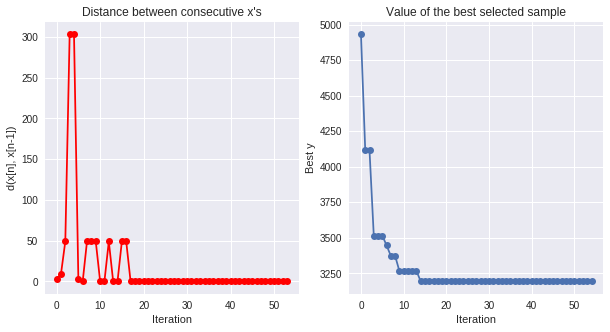

In [39]:
optimizer.plot_convergence()

Best values of parameters:

In [40]:
optimizer.X[np.argmin(optimizer.Y)]

array([9.22836856e-02, 1.89172284e+00, 1.00000000e+00, 3.00000000e+02,
       1.00000000e+00])

In [41]:
print('MSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)

MSE: 3192.9357292803816 Gain: 109.58415695994108


We were able to get 9% boost without tuning parameters by hand! Let's see if you can do the same. 

<b>Task 2.1:</b> Tune SVR model.<br> Find optimal values for three parameters: `C`, `epsilon` and `gamma`.
<br>Use range (1e-5, 1000) for `C`, (1e-5, 10) for `epsilon` and `gamma`. 
<br>Use MPI as an acquisition function with weight 0.1. Submit the optimal value of epsilon that was found by a model.

baseline: 6067.652263997995


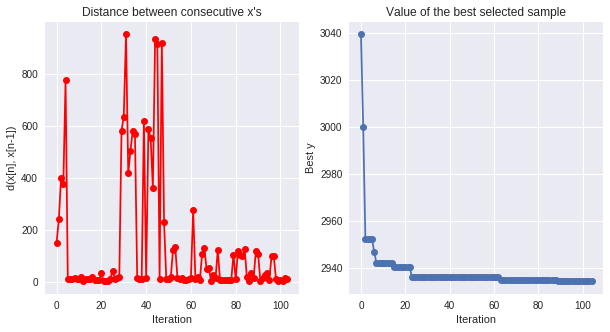

 res: [35.80338868  9.78062688  8.28061105]
best_epsilon: 8.28061105289118
Current answer for task 2.1 is: 8.28061105289118


In [60]:
### YOUR CODE HERE
baseline = -cross_val_score(
    SVR(), X, y, scoring='neg_mean_squared_error'
).mean()
print('baseline: ' + str(baseline))

bounds = [
   {'name': 'C', 'type': 'continuous', 'domain': (1e-5, 1000)},
   {'name': 'epsilon', 'type': 'continuous', 'domain': (1e-5, 10)},
   {'name': 'gamma', 'type': 'continuous', 'domain': (1e-5, 10)}
]

# 
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(C=parameters[0],
            epsilon=parameters[1],
            gamma=parameters[2]), 
        X, y, scoring='neg_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(
    f=f, domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)

max_iter = 50 * 2
max_time = 60 * 4
optimizer.run_optimization(max_iter, max_time)

optimizer.plot_convergence()

res = optimizer.X[np.argmin(optimizer.Y)]
print(" res: " + str(res))

best_epsilon = res[2] ### YOUR CODE HERE
print('best_epsilon: ' + str(best_epsilon))

grader.submit_GPyOpt_1(best_epsilon)

<b>Task 2.2:</b> For the model above submit boost in improvement that you got after tuning hyperparameters (output percents) [e.g. if baseline MSE was 40 and you got 20, output number 200]

In [65]:
print('baseline : ' + str(baseline))

min_opt = np.min(optimizer.Y)
print('opt.min : ' + str(min_opt))

performance_boost = baseline / min_opt ### YOUR CODE HERE
grader.submit_GPyOpt_2(performance_boost*100)

baseline : 6067.652263997995
opt.max : 6103.6576915747355
opt.min : 2934.214570852324
Current answer for task 2.2 is: 206.78965758920205


# Authorization & Submission
To submit assignment parts to Cousera platform, please, enter your e-mail and token into variables below. You can generate a token on this programming assignment's page. <b>Note:</b> The token expires 30 minutes after generation.

In [66]:
STUDENT_EMAIL = 'lacsap_666@yahoo.fr' # EMAIL HERE
STUDENT_TOKEN = 'kTnNRZVZ0jdbL8i6' # TOKEN HERE
grader.status()

You want to submit these numbers:
Task 1.1: 1.0461813545396959
Task 1.2 (mean): 0.6646774926102937
Task 1.2 (variance): 1.1001478223790582
Task 1.3: 1.6252681650349912
Task 1.4 (noise): 10.143329676224383
Task 1.4 (just signal): 1.4982810919653512e-14
Task 1.5: 4.204566911334504
Task 2.1: 8.28061105289118
Task 2.2: 206.78965758920205


If you want to submit these answers, run cell below

In [67]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
